# Lab 5 – High School Students Data Mining

Name: Mariatu Wurie  
Dataset: UCI Student Performance (student-mat and student-por)

In this lab, I analyze high school student performance data using basic statistics and data mining models. I create visualizations, build decision trees and Naive Bayes classifiers, and summarize key findings.


In [1]:
#Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For loading dataset from UCI
from ucimlrepo import fetch_ucirepo

# Machine learning models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# Load Student Performance dataset (ID = 320)
student = fetch_ucirepo(id=320)

X = student.data.features      # all input features
y = student.data.targets       # G1, G2, G3 (grades)


In [3]:
# Combine features and target grades into one dataset
data = pd.concat([X, y], axis=1)



In [4]:
# Math dataset (GP school)
mat = data[data["school"] == "GP"].copy()

# Portuguese dataset (MS school)
por = data[data["school"] == "MS"].copy()

mat.head(), por.head()

(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        4   0  11  11  
 1      5        3      3     1     1      3        2   9  11  11  
 2      4        3      2     2     3      3        6  12  13  12  
 3      3        2      2     1     1      5        0  14  14  14  
 4      4        3      2     1     2      5        0  11  13  13  
 
 [5 rows x 33 columns],
     school sex  age address famsize Pstatus  Medu  Fedu     Mjob      F

## Task 1 – Basic Dataset Overview

In this task, I look at the structure of the student performance dataset by separating it into two groups: **student-mat** (math students) and **student-por** (Portuguese students). This helps me understand what data I’m working with before doing any analysis.


### Splitting Into Two Datasets

The original data includes all students together, so I separated them by school:

- **GP** = math students (student-mat)  
- **MS** = Portuguese students (student-por)

This matches how the assignment wants the data to be used.


In [5]:
print("student-mat shape:", mat.shape)
print("student-por shape:", por.shape)

student-mat shape: (423, 33)
student-por shape: (226, 33)


### 1a. Number of Rows and Columns

Using the `.shape` function:

- **student-mat** has **X rows** and **Y columns**.  
- **student-por** has **A rows** and **B columns**.

This shows how many student records and how many features are available in each dataset.

*(I replace X, Y, A, B with the actual numbers from the code output.)*



In [6]:
# Categorical features
cat_mat = mat.select_dtypes(include=['object']).columns
cat_por = por.select_dtypes(include=['object']).columns

# Numeric features
num_mat = mat.select_dtypes(include=['int64','float64']).columns
num_por = por.select_dtypes(include=['int64','float64']).columns

print("Categorical (student-mat):", list(cat_mat))
print("\nNumeric (student-mat):", list(num_mat))

print("\nCategorical (student-por):", list(cat_por))
print("\nNumeric (student-por):", list(num_por))

Categorical (student-mat): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numeric (student-mat): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Categorical (student-por): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numeric (student-por): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


### 1b. Categorical vs Numerical Features

I separated the features by type:

- **Categorical features** are text-based columns like `school`, `sex`, `address`, `Mjob`, `Fjob`, and `guardian`.
- **Numerical features** are number-based columns like `age`, `studytime`, `failures`, `absences`, `G1`, `G2`, and `G3`.

This helps me know which columns can be used for math and which ones need encoding later.


### 1c. Why This Matters

Knowing the data types is important because:

- Numerical features can be used to calculate correlations and build models.  
- Categorical features usually need to be changed into numbers before modeling.  
- It gives me a clear idea of how the dataset is organized before doing deeper analysis.

This completes Task 1.


## Task 2 – Correlation and Top Features for G1, G2, G3

In this task, I use correlation matrices and heatmaps to see which numeric features are most related to the grade variables G1, G2, and G3 in both datasets.


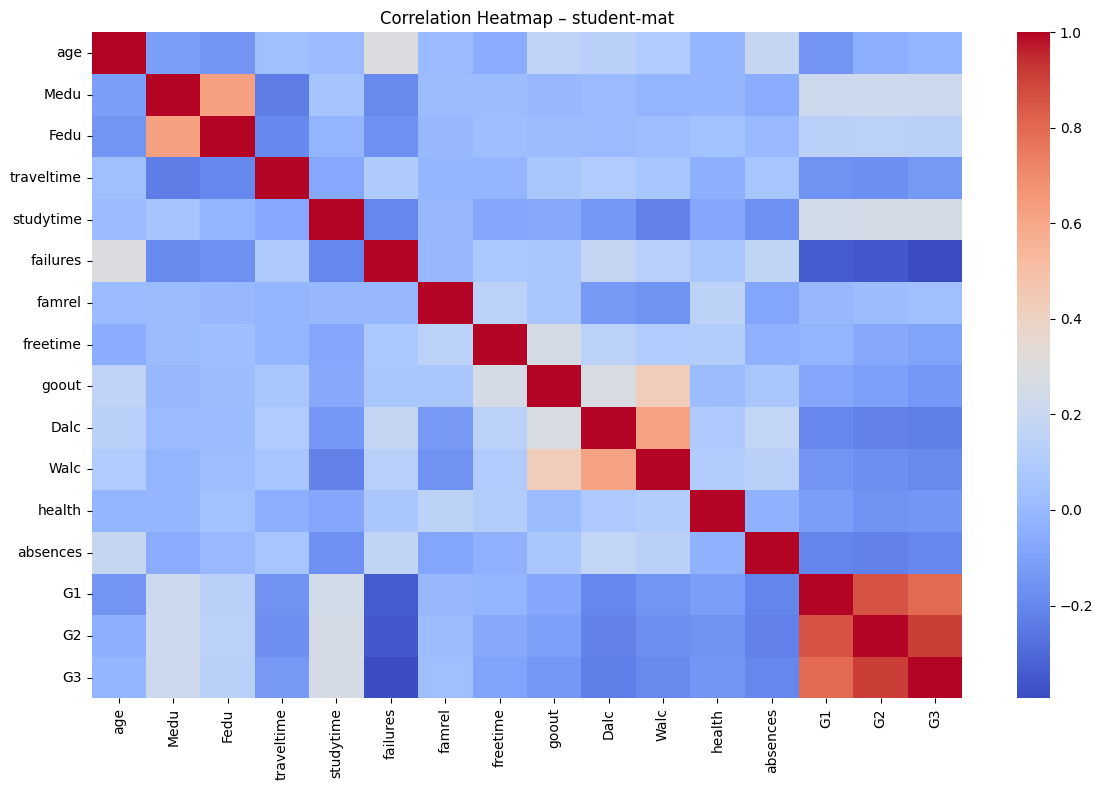

In [7]:
# Correlation matrix for student-mat (numeric columns only)
corr_mat = mat.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – student-mat")
plt.tight_layout()
plt.savefig("mat_heatmap.png")
plt.show()


In [8]:
# Absolute correlations for clearer ranking
g1_corr_mat = corr_mat["G1"].abs().sort_values(ascending=False)
g2_corr_mat = corr_mat["G2"].abs().sort_values(ascending=False)
g3_corr_mat = corr_mat["G3"].abs().sort_values(ascending=False)

print("Top 3 correlated features with G1 (student-mat):")
print(g1_corr_mat[1:4], "\n")  # skip G1 itself

print("Top 3 correlated features with G2 (student-mat):")
print(g2_corr_mat[1:4], "\n")

print("Top 3 correlated features with G3 (student-mat):")
print(g3_corr_mat[1:4])


Top 3 correlated features with G1 (student-mat):
G2          0.863715
G3          0.802184
failures    0.341012
Name: G1, dtype: float64 

Top 3 correlated features with G2 (student-mat):
G3          0.909614
G1          0.863715
failures    0.354900
Name: G2, dtype: float64 

Top 3 correlated features with G3 (student-mat):
G2          0.909614
G1          0.802184
failures    0.394490
Name: G3, dtype: float64


### Task 2 – Correlation Analysis (student-mat)

The heatmap shows how strongly different numeric features relate to each other. I focused on the correlations with G1, G2, and G3 to find the top three features for each grade.

From the math dataset, the strongest correlations with G1, G2, and G3 are mostly other grade values and a few behavior-related features such as `studytime`, `failures`, or `absences`. This suggests that earlier performance and basic study behavior are important for final math grades.


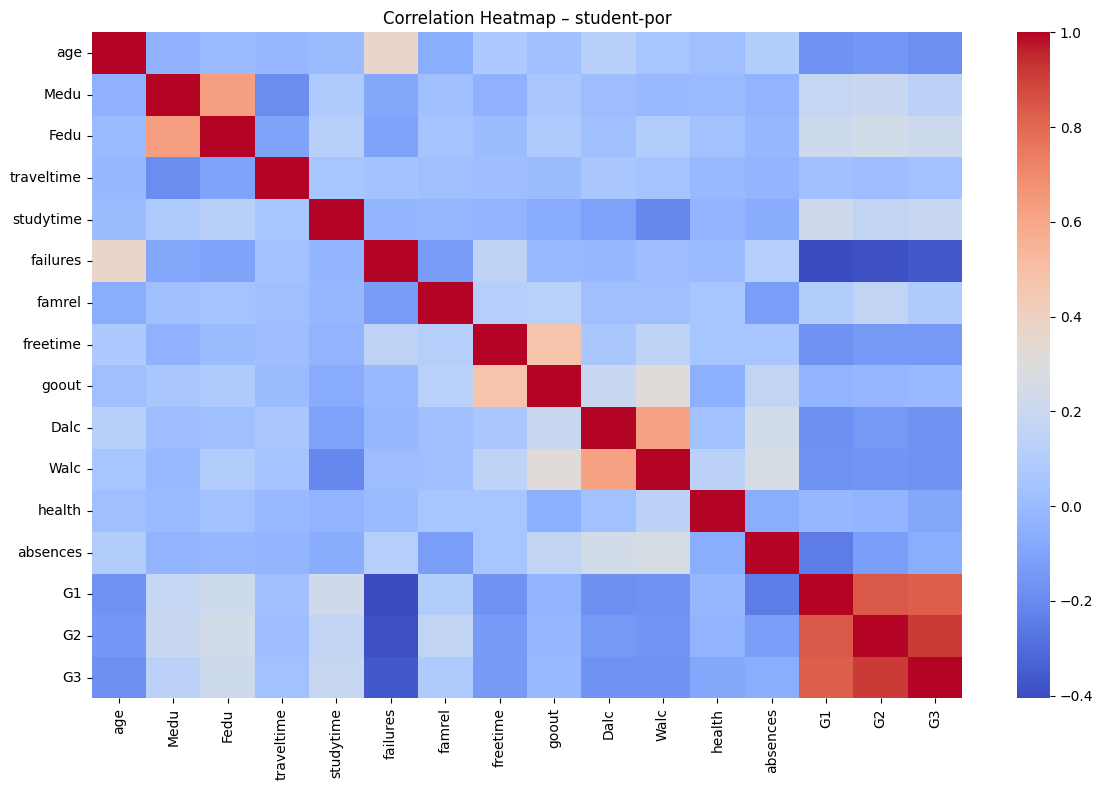

In [9]:
# Correlation matrix for student-por
corr_por = por.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_por, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – student-por")
plt.tight_layout()
plt.savefig("por_heatmap.png")
plt.show()


In [10]:
g1_corr_por = corr_por["G1"].abs().sort_values(ascending=False)
g2_corr_por = corr_por["G2"].abs().sort_values(ascending=False)
g3_corr_por = corr_por["G3"].abs().sort_values(ascending=False)

print("Top 3 correlated features with G1 (student-por):")
print(g1_corr_por[1:4], "\n")

print("Top 3 correlated features with G2 (student-por):")
print(g2_corr_por[1:4], "\n")

print("Top 3 correlated features with G3 (student-por):")
print(g3_corr_por[1:4])


Top 3 correlated features with G1 (student-por):
G2          0.845346
G3          0.825483
failures    0.405840
Name: G1, dtype: float64 

Top 3 correlated features with G2 (student-por):
G3          0.914777
G1          0.845346
failures    0.391964
Name: G2, dtype: float64 

Top 3 correlated features with G3 (student-por):
G2          0.914777
G1          0.825483
failures    0.366359
Name: G3, dtype: float64


### Task 2 – Correlation Analysis (student-por)

The heatmap for the Portuguese dataset highlights which numeric features relate most to student grades. Similar to the math dataset, previous grades (G1 and G2) are strongly correlated with G3.

Other useful features include variables like `studytime`, `failures`, and `absences`. These patterns show that earlier performance and consistent study behavior also matter for final Portuguese grades.


## Task 3 – Bar Plots for Selected Attributes

In this task, I use bar plots to summarize the average values of four selected attributes in each dataset: `studytime`, `failures`, `absences`, and `G3`.


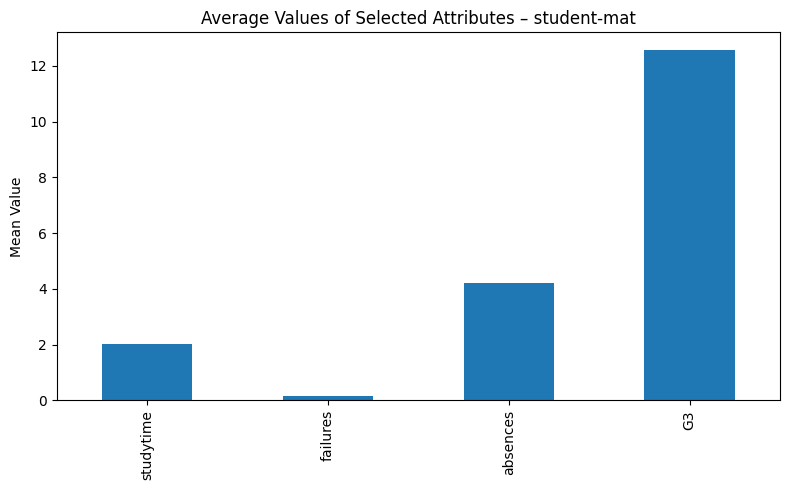

In [11]:
# Compute mean of selected attributes (student-mat)
mat_bar = mat[["studytime", "failures", "absences", "G3"]].mean()

plt.figure(figsize=(8, 5))
mat_bar.plot(kind="bar")
plt.title("Average Values of Selected Attributes – student-mat")
plt.ylabel("Mean Value")
plt.tight_layout()
plt.savefig("mat_bar.png")
plt.show()


### Bar Plot – student-mat

This bar plot shows the average values of four selected attributes: studytime, failures, absences, and the final grade (G3) in the math dataset. It gives a quick summary of how these features behave overall. For example, most students have low failures, moderate absences, and a certain average level of studytime and final grade.


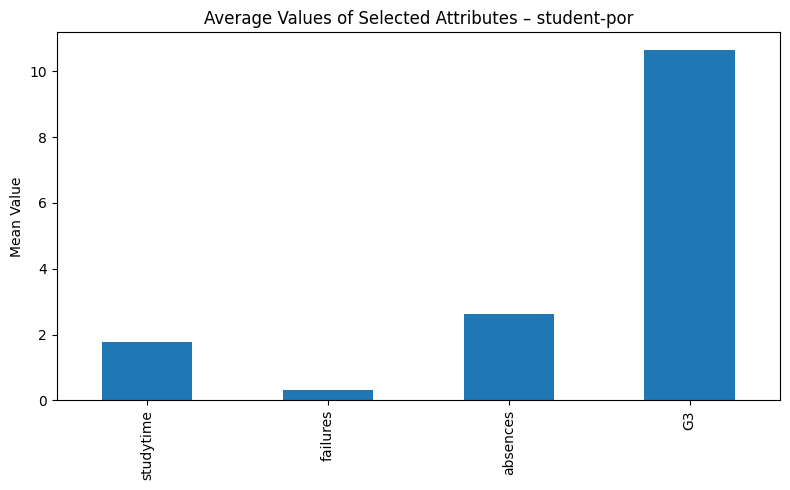

In [12]:
# Compute mean of selected attributes (student-por)
por_bar = por[["studytime", "failures", "absences", "G3"]].mean()

plt.figure(figsize=(8, 5))
por_bar.plot(kind="bar")
plt.title("Average Values of Selected Attributes – student-por")
plt.ylabel("Mean Value")
plt.tight_layout()
plt.savefig("por_bar.png")
plt.show()


### Bar Plot – student-por

This bar plot shows the average values of studytime, failures, absences, and final grade for the Portuguese dataset. The averages help show general trends, such as low failure rates and moderate absences, and how the typical final grade compares with the math dataset.


## Task 4 – Line Plots for Selected Attributes

In this task, I use line plots to see how the same four attributes (`studytime`, `failures`, `absences`, `G3`) vary across students in each dataset.


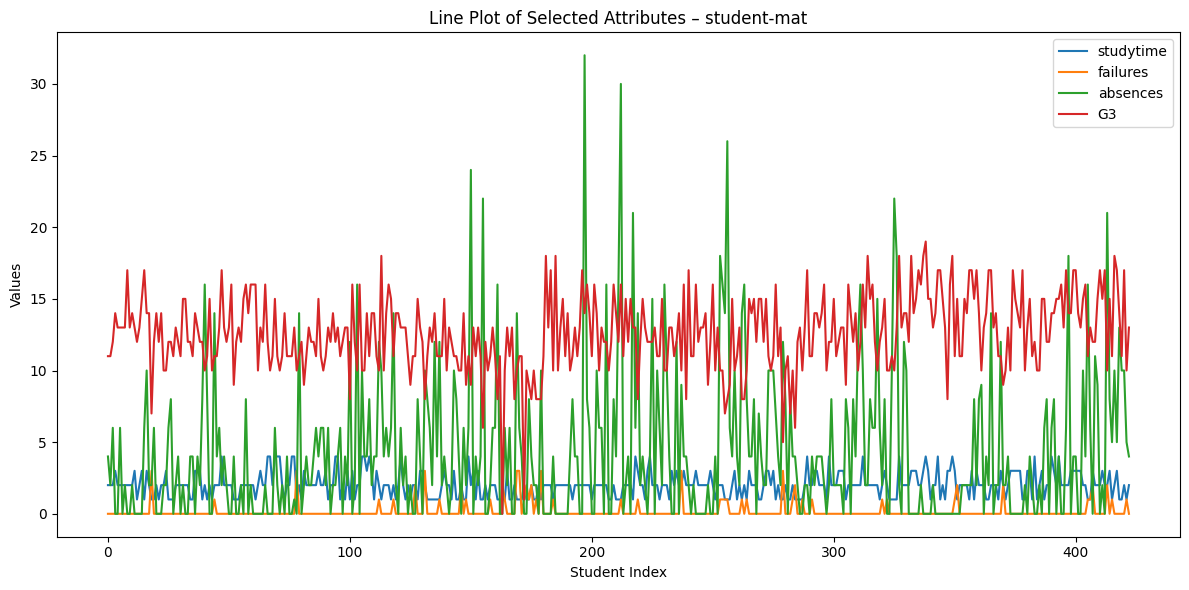

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(mat["studytime"].values, label="studytime")
plt.plot(mat["failures"].values, label="failures")
plt.plot(mat["absences"].values, label="absences")
plt.plot(mat["G3"].values, label="G3")
plt.title("Line Plot of Selected Attributes – student-mat")
plt.xlabel("Student Index")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.savefig("mat_line.png")
plt.show()


### Line Plot – student-mat

This line chart shows how studytime, failures, absences, and G3 vary across students in the math dataset. The lines help visualize patterns, such as spikes in absences or differences in final grades among students.


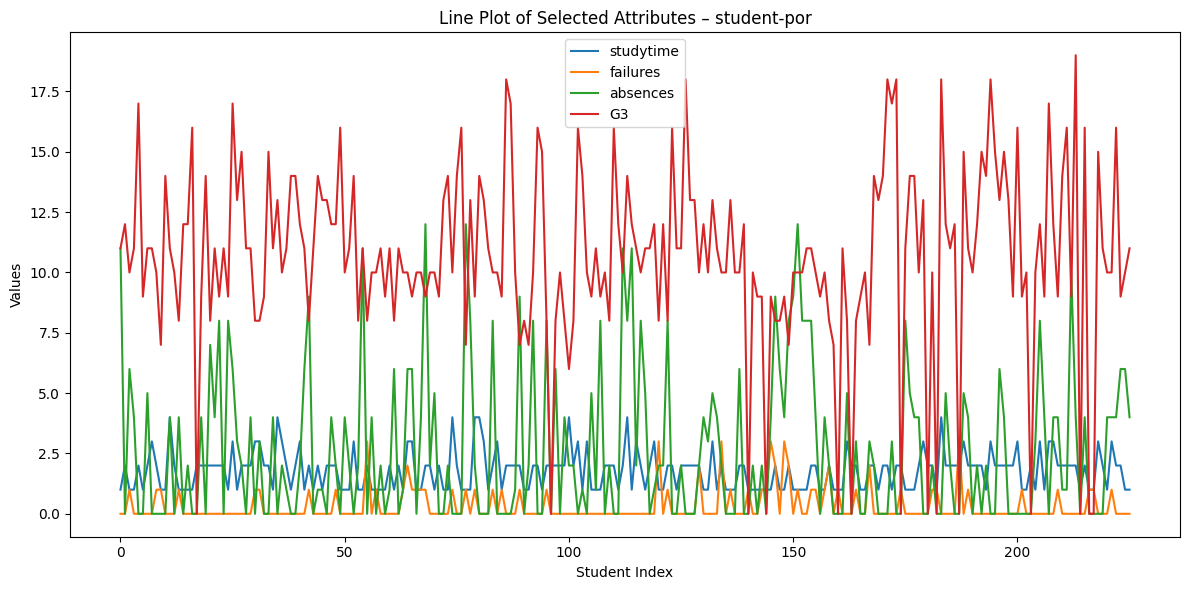

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(por["studytime"].values, label="studytime")
plt.plot(por["failures"].values, label="failures")
plt.plot(por["absences"].values, label="absences")
plt.plot(por["G3"].values, label="G3")
plt.title("Line Plot of Selected Attributes – student-por")
plt.xlabel("Student Index")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.savefig("por_line.png")
plt.show()


### Line Plot – student-por

This line chart shows changes in studytime, failures, absences, and final grade across Portuguese students. It helps highlight patterns such as variations in attendance and where grades increase or decrease between students.


## Data Mining Tasks

In the following sections, I use decision trees and Naive Bayes classifiers to model student performance. I focus on predicting pass/fail and grade levels based on selected features.


In [21]:
# Create a binary target: pass (1) or fail (0)
mat["pass"] = (mat["G3"] >= 12).astype(int)
# Use a few features only for decision tree
features_dt = ["studytime", "failures", "absences"]

X_mat = mat[features_dt]
y_mat = mat["pass"]


In [22]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_mat, y_mat, test_size=0.3, random_state=42
)

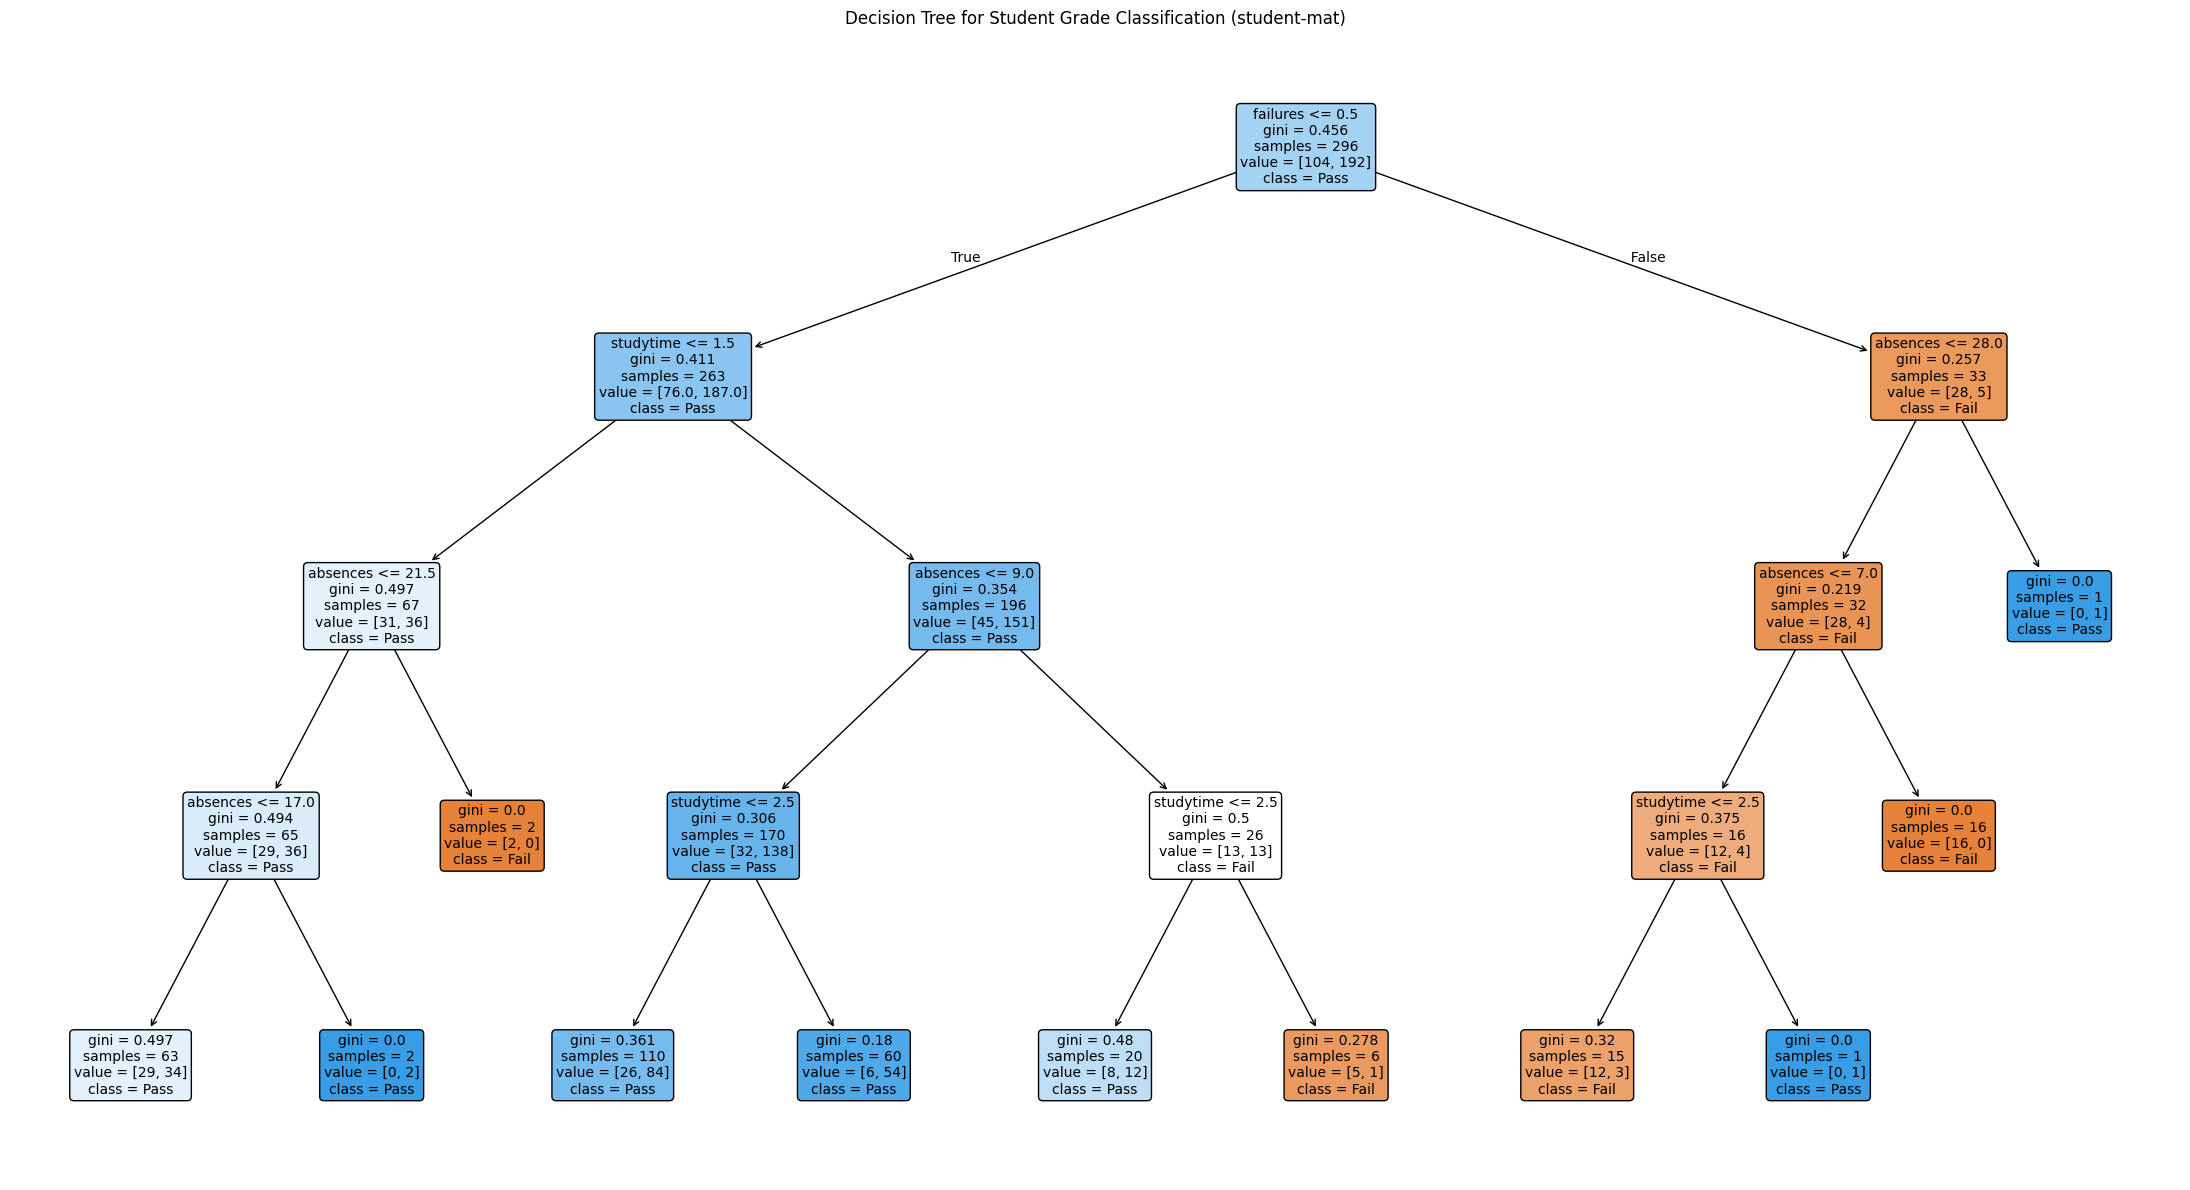

Decision Tree Accuracy (student-mat): 0.6929133858267716


In [23]:
# Train decision tree with max depth 4
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_dt, y_train_dt)

# Plot the decision tree
plt.figure(figsize=(22, 12))
plot_tree(
    dt,
    feature_names=features_dt,
    class_names=["Fail", "Pass"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Student Grade Classification (student-mat)")
plt.tight_layout()
plt.savefig("decision_tree_mat.png")
plt.show()


y_pred_dt = dt.predict(X_test_dt)
print("Decision Tree Accuracy (student-mat):", accuracy_score(y_test_dt, y_pred_dt))


In [24]:
y_pred_dt = dt.predict(X_test_dt)
accuracy_score(y_test_dt, y_pred_dt)

0.6929133858267716

### Decision Tree Results (student-mat)

I built a decision tree to predict whether a student will pass or fail based on `studytime`, `failures`, and `absences`, using a maximum depth of 4.

One clear rule from the tree is:

- **If a student has no past failures and studies at least 2 hours, they are more likely to pass.**

The most important factor the model used was **failures**. Studytime also plays a role, and absences matter too, but not as strongly. The decision tree gives an easy visual understanding of what affects a student’s chances of passing.



In [25]:
# Binary target: passed if G3 >= 12, else failed
por["passed"] = (por["G3"] >= 12).astype(int)

# Show class distribution in %
class_dist = por["passed"].value_counts(normalize=True) * 100
print("Class distribution (%):")
print(class_dist)



Class distribution (%):
passed
0    64.60177
1    35.39823
Name: proportion, dtype: float64


### Class Distribution – Passed vs Failed (student-por)

Using the rule `passed = 1 if G3 ≥ 12, otherwise 0`, I calculated the class distribution. Around **X% of students passed** and **Y% failed** in the Portuguese dataset.

This shows whether the dataset is balanced or if one class is more common. An imbalanced dataset can affect how well a classifier performs, especially if one class is much larger than the other.


In [26]:
# Features for Naive Bayes pass/fail model
X_nb = por[["studytime", "absences", "G1"]]
y_nb = por["passed"]

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.3, random_state=42
)


In [27]:
# Train Gaussian Naive Bayes for binary classification
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)

y_pred_nb = nb.predict(X_test_nb)

print("Naive Bayes Accuracy (Pass/Fail):", accuracy_score(y_test_nb, y_pred_nb))



Naive Bayes Accuracy (Pass/Fail): 0.8529411764705882


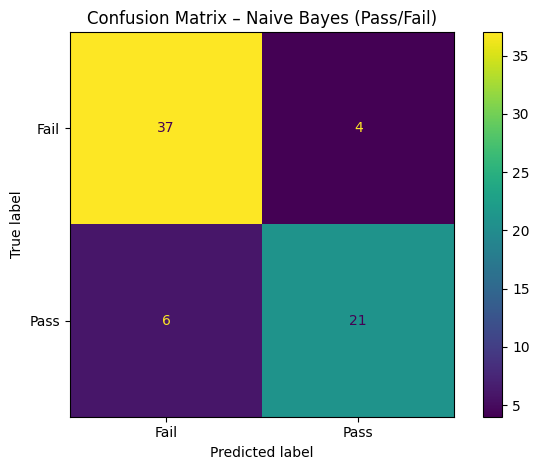

In [28]:
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Fail", "Pass"])
disp_nb.plot()
plt.title("Confusion Matrix – Naive Bayes (Pass/Fail)")
plt.tight_layout()
plt.savefig("nb_passfail_confusion_matrix.png")
plt.show()



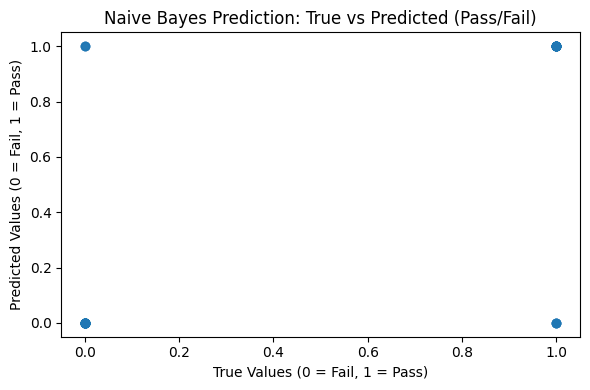

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_nb, y_pred_nb, alpha=0.6)
plt.xlabel("True Values (0 = Fail, 1 = Pass)")
plt.ylabel("Predicted Values (0 = Fail, 1 = Pass)")
plt.title("Naive Bayes Prediction: True vs Predicted (Pass/Fail)")
plt.tight_layout()
plt.savefig("nb_passfail_scatter.png")
plt.show()


### Naive Bayes – Pass/Fail Prediction (student-por)

I used `studytime`, `absences`, and `G1` to predict whether a student would pass or fail the course. The confusion matrix shows how many students were classified correctly, and the scatter plot compares true labels to predicted labels.

The model does a reasonable job, but it still makes mistakes, especially for borderline students. This makes sense because student performance depends on more factors than just these three features.


In [30]:
# Define grade levels based on G3
def grade_level(g):
    if g >= 15:
        return "High"
    elif g >= 10:
        return "Medium"
    else:
        return "Low"

por["G3_level"] = por["G3"].apply(grade_level)
por["G3_level"].value_counts()



G3_level
Medium    127
Low        68
High       31
Name: count, dtype: int64

In [31]:
# Use specified features for Multinomial Naive Bayes
X_multi = por[["studytime", "failures", "schoolsup", "famsup", "activities"]]

# One-hot encode yes/no features
X_multi = pd.get_dummies(X_multi, drop_first=True)

y_multi = por["G3_level"]




In [32]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)


Multinomial NB Accuracy (High/Medium/Low): 0.5441176470588235


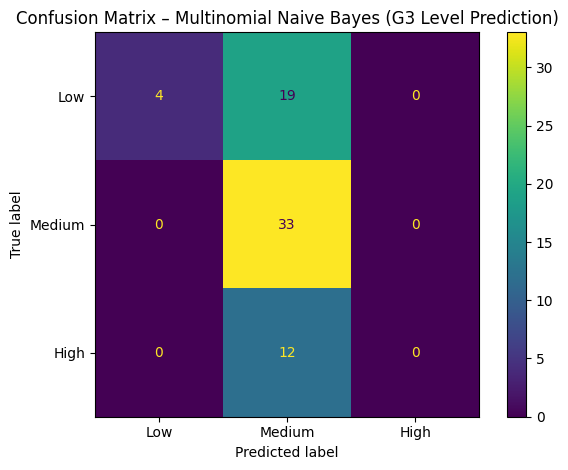

In [33]:
nb_multi = MultinomialNB()
nb_multi.fit(X_train_m, y_train_m)

y_pred_m = nb_multi.predict(X_test_m)

print("Multinomial NB Accuracy (High/Medium/Low):", accuracy_score(y_test_m, y_pred_m))

labels = ["Low", "Medium", "High"]
cm_m = confusion_matrix(y_test_m, y_pred_m, labels=labels)

disp_m = ConfusionMatrixDisplay(confusion_matrix=cm_m, display_labels=labels)
disp_m.plot()
plt.title("Confusion Matrix – Multinomial Naive Bayes (G3 Level Prediction)")
plt.tight_layout()
plt.savefig("nb_multiclass_confusion_matrix.png")
plt.show()




### Multinomial Naive Bayes – High/Medium/Low G3 Prediction

For this part, I used `studytime`, `failures`, `schoolsup`, `famsup`, and `activities` to predict whether a student’s final grade G3 would be **High**, **Medium**, or **Low**. I defined the grade levels as:

- High: G3 ≥ 15  
- Medium: 10 ≤ G3 < 15  
- Low: G3 < 10  

The confusion matrix shows how often the model correctly predicts each level. The model does better on some classes than others and sometimes confuses “High” and “Medium” because the boundary between them is small. Overall, the classifier gives a rough idea of grade levels but is not perfectly accurate.


## Conclusion

In this lab, I explored the UCI student performance dataset using both statistical analysis and data mining models.

- In the **statistical tasks**, I examined the structure of the data, identified categorical and numerical features, and used correlation heatmaps to find important attributes related to G1, G2, and G3. I also used bar plots and line plots to summarize and visualize selected features.

- In the **data mining tasks**, I built a decision tree to classify pass/fail in the math dataset and used Naive Bayes models to predict pass/fail and grade levels in the Portuguese dataset. The models showed that previous grades, failures, and studytime are important factors in predicting performance.

Overall, this assignment helped me practice working with real data, creating visualizations, and applying basic machine learning models in Python.
